<a href="https://colab.research.google.com/github/AminaZahid/Hate-Speech-Detection-using-ML/blob/main/Hate_Speech_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier

In [30]:
data = pd.read_csv("/content/drive/MyDrive/RomanUrduHateSpeech.csv")
data.head()

,comment,label
0,hey watch my funny vines,False
1,ara mush watch our funny video on ram rahim au...,False
2,kafi sehi vdo h yie,False
3,hahhahahahha hahaha i just can t stop laughing...,False
4,hahaha i saw her videos too and i got cancer c...,False


In [3]:
#pip install nltk

In [4]:
import nltk
import re

In [5]:
nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Pre-processing
def clean (comment):
 comment = str (comment). lower()
 comment = re. sub('[.?]', '', comment) 
 comment = re. sub('https?://\S+|www.\S+', '', comment)
 comment = re. sub('<.?>+', '', comment)
# comment = re. sub('[%s]' % re. escape(string. punctuation), '', comment)
 comment = re. sub('\n', '', comment)
 comment = re. sub('\w\d\w', '', comment)
 comment = [word for word in comment.split(' ') if word not in stopword]
 comment=" ". join(comment)
 comment = [stemmer. stem(word) for word in comment. split(' ')]
 comment=" ". join(comment)
 return comment
data["comment"] = data["comment"]. apply(clean)

In [7]:
data.dropna()

,comment,label
0,hey watch funni vine,False
1,ara mush watch funni video ram rahim aur achha...,False
2,kafi sehi vdo h yie,False
3,hahhahahahha hahaha stop laugh samos ko shield...,False
4,hahaha saw video got cancer carri video sent t...,False
...,...,...
170986,hamari jese awam teli laga k mazay leti,True
170987,kaash hum b parhay likhay hotaykabhi likhtay g...,True
170988,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,True
170989,aanti toh gussa e kr gai hain,True


In [8]:
#data[:] = np.nan_to_num(data)

In [9]:
#data.isnull().sum()

In [10]:
#data.fillna(method='ffill',inplace=True)

In [11]:
data.drop_duplicates()

,comment,label
0,hey watch funni vine,False
1,ara mush watch funni video ram rahim aur achha...,False
2,kafi sehi vdo h yie,False
3,hahhahahahha hahaha stop laugh samos ko shield...,False
4,hahaha saw video got cancer carri video sent t...,False
...,...,...
170986,hamari jese awam teli laga k mazay leti,True
170987,kaash hum b parhay likhay hotaykabhi likhtay g...,True
170988,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,True
170989,aanti toh gussa e kr gai hain,True


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170991 entries, 0 to 170990
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  170991 non-null  object
 1   label    170975 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [14]:
#data.replace("?",np.nan,inplace=True)

In [15]:
#data.replace('NaN',0)

<Axes: xlabel='label', ylabel='count'>

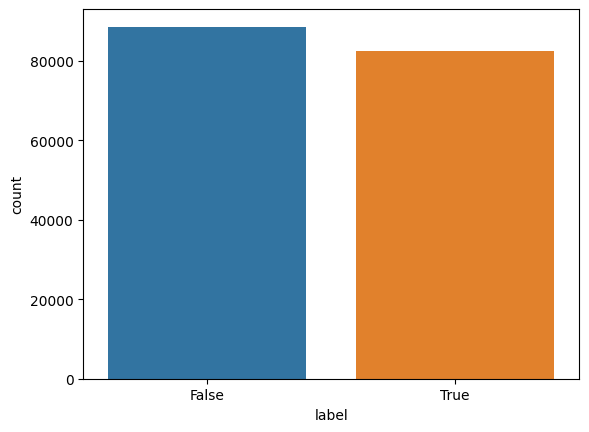

In [18]:
sns.countplot(x='label',data=data)

In [19]:
df=data.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
le = LabelEncoder()
le.fit(df['label'])
df['encoded_label'] = le.transform(df['label'])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df['comment'], df['encoded_label'], test_size = 0.30, random_state = 7)

In [23]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (119693,)
Shape of X_test (51298,)
Shape of Y_train (119693,)
Shape of Y_test (51298,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [24]:
# ----------------SVM-----------------------#
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [25]:
# ----------------LR-----------------------#
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [26]:
# -----------------DT-----------------------#
def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test) 

In [27]:
# -----------------XGBoost-----------------------#
def XGB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
    XGB.fit(train_vecs, Y_train)

    # Testing
    test_predictionXGB = XGB.predict(test_vecs)
    return classification_report(test_predictionXGB, Y_test), confusion_matrix(test_predictionXGB, Y_test) 

In [28]:
# -----------------RF-----------------------#
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

In [29]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM Classifier on TF-IDF Vectorizer')
print(class_report)
#print(conf_matrix)

Results of SVM Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     28088
           1       0.91      0.97      0.94     23210
           2       0.00      0.00      0.00         0

    accuracy                           0.94     51298
   macro avg       0.63      0.63      0.63     51298
weighted avg       0.95      0.94      0.94     51298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer')
print(class_report)
#print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     28442
           1       0.89      0.97      0.93     22856
           2       0.00      0.00      0.00         0

    accuracy                           0.93     51298
   macro avg       0.62      0.62      0.62     51298
weighted avg       0.94      0.93      0.93     51298



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [31]:
class_report , conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer')
print(class_report)
#print(conf_matrix)

Results of Decision Tree Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.88      0.71      0.79     32956
           1       0.61      0.83      0.70     18342
           2       0.00      0.00      0.00         0

    accuracy                           0.75     51298
   macro avg       0.50      0.51      0.50     51298
weighted avg       0.79      0.75      0.76     51298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
class_report , conf_matrix = XGB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Xgboost Classifier on TF-IDF Vectorizer')
print(class_report)
#print(conf_matrix)

Results of Xgboost Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     32099
           1       0.70      0.90      0.79     19199
           2       0.00      0.00      0.00         0

    accuracy                           0.82     51298
   macro avg       0.54      0.56      0.54     51298
weighted avg       0.84      0.82      0.82     51298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
class_report , conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer')
print(class_report)
#print(conf_matrix)

Results of Random Forest Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     38896
           1       0.47      0.94      0.62     12402
           2       0.00      0.00      0.00         0

    accuracy                           0.73     51298
   macro avg       0.48      0.53      0.47     51298
weighted avg       0.85      0.73      0.75     51298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
df=data.copy()

In [35]:
df.shape

(170991, 2)

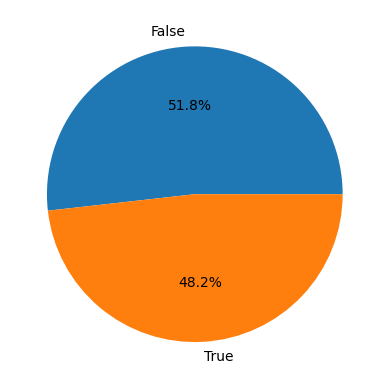

In [36]:
plt.pie(df['label'].value_counts().values,
        labels = df['label'].value_counts().index,
        autopct='%1.1f%%')
plt.show()